# VGGNet

VGGNet은 2014년 ILSVRC에서 비록 다음에 배울 GoogLeNet에 밀려 2위를 했지만, 훨씬 간단한 구조로 이해와 변형이 쉽다는 장점이 있어 많이 응용된 모델이다.

#### VGGNet의 구조 

VGGNet의 개발자들은 모델의 깊이가 성능에 얼마나 영향을 끼칠지에 집중하여 연구하였다고 논문에서 밝혔다. 깊은 네트워크를 가지고 있지만, GoogLeNet과 비교하면, 구조가 매우 간단하다. 깊이에 따른 변화를 비교하기 위해, 3x3의 작은 필터 크기를 사용했고, 모델 깊이와 구조에 변화를 주어 실험하였다. 논문에서 언급한 것은 총 6개의 모델로 내용은 다음 표와 같다. 표의 "D" 구조를 VGG16, "E" 구조를 VGG19라고 부른다. 다음 표에서, "conv 3, 64" 는 3x3 컨볼루션(convolution) 연산에 출력 피쳐맵 갯수는 64개라는 뜻이다. 

|  A  |  A-LRN  |   B   |   C   |   D   |   E   |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|11개의 레이어|11개의 레이어|13개의 레이어|16개의 레이어|16개의 레이어|19개의 레이어|
|conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64| 
|          |LRN       |conv 3, 64|conv 3, 64|conv 3, 64|conv 3, 64|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|
|           |           |conv 3, 128|conv 3, 128|conv 3, 128|conv 3, 128|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|
|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|conv 3, 256|
|           |           |           |conv 1, 256|conv 3, 256|conv 3, 256|
|           |           |           |           |           |conv 3, 256|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|           |           |           |conv 1, 512|conv 3, 512|conv 3, 512|
|           |           |           |           |           |conv 3, 512|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|conv 3, 512|
|           |           |           |conv 1, 512|conv 3, 512|conv 3, 512|
|           |           |           |           |           |conv 3, 512|
| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2| maxpool 2|
| FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  |
| FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  | FCN 4096  |
| FCN 1000  | FCN 1000  | FCN 1000  | FCN 1000  | FCN 1000  | FCN 1000  |
 

표 : VGGNet 

#### VGGNet의 특징 

VGGNet의 특징은 작은 필터 크기의 convolution 연산이다. AlexNet의 경우, 첫번째 convolution layer의 필터 크기는 11x11, GoogLeNet의 경우는 7x7 이었다. 반면, VGG는 처음부터 끝까지 3x3의 필터 크기를 사용하여 좋은 성과를 거두었다. 3x3 convolution 연산을 쌓는 것이 어떤 의미가 있는 것일까?

3x3 convolution을 두 번 쌓는 것은 5x5 convolution과 동일한 receptive field의 정보를 처리하고, 세 번 쌓는 것은 7x7의 receptive field의 정보를 처리한다. 하지만, 3x3을 여러번 쌓는 것이 더 좋은 성능을 낸다. 그 이유는 두 가지이다. 첫째로 3x3 convolution 연산을 여러번 하는 것은 여러번의 비선형 처리를 해주는 것이므로, 큰 필터로 한번 연산 했을 때보다 더 많은 비선형성을 가질 수 있다. 두번째로는 그럼에도 불구하고, 파라미터 수는 3x3 convolution을 여러번 했을 때 더 적다. 예를 들어, 채널의 갯수가 $C$라고 할 때, 7x7의 경우는 $7^2 \times C^2$의 파라미터를 가지지만, 3x3을 세 번 쌓은 경우에는, $3 \times (3^2 \times C^2)$의 파라미터를 가진다. 

#### VGGNet의 단점

다음에 나오는 VGG16의 summary 결과를 보면, 어마하게 많은 파라미터가 존재한다는 것을 알 수 있다. VGGNet은 간단한 구조를 가졌지만, fully connected layer가 3개가 있고, 풀링(pooling)을 거친 뒤에는 피쳐맵의 갯수가 2배로 커지면서 필요한 파라미터가 과도하게 많아졌다. 파라미터가 많다는 것은 딥러닝의 고질적인 문제인, gradient vanishing, 과적합등의 문제가 발생할 가능성이 크다는 의미이다.

실제로 VGG16과 VGG19는 학습에 어려움이 있었다. 논문 저자들은 이 문제를 해결하기 위해, 표 18.4.2 의 "A" 모델로 학습한 fully connected layer의 가중치를 초기값으로 주어 16, 19개의 layer의 모델들을 학습시켰다.

#### Keras의 VGGNet

In [1]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

indigo_bunting (99.99%)


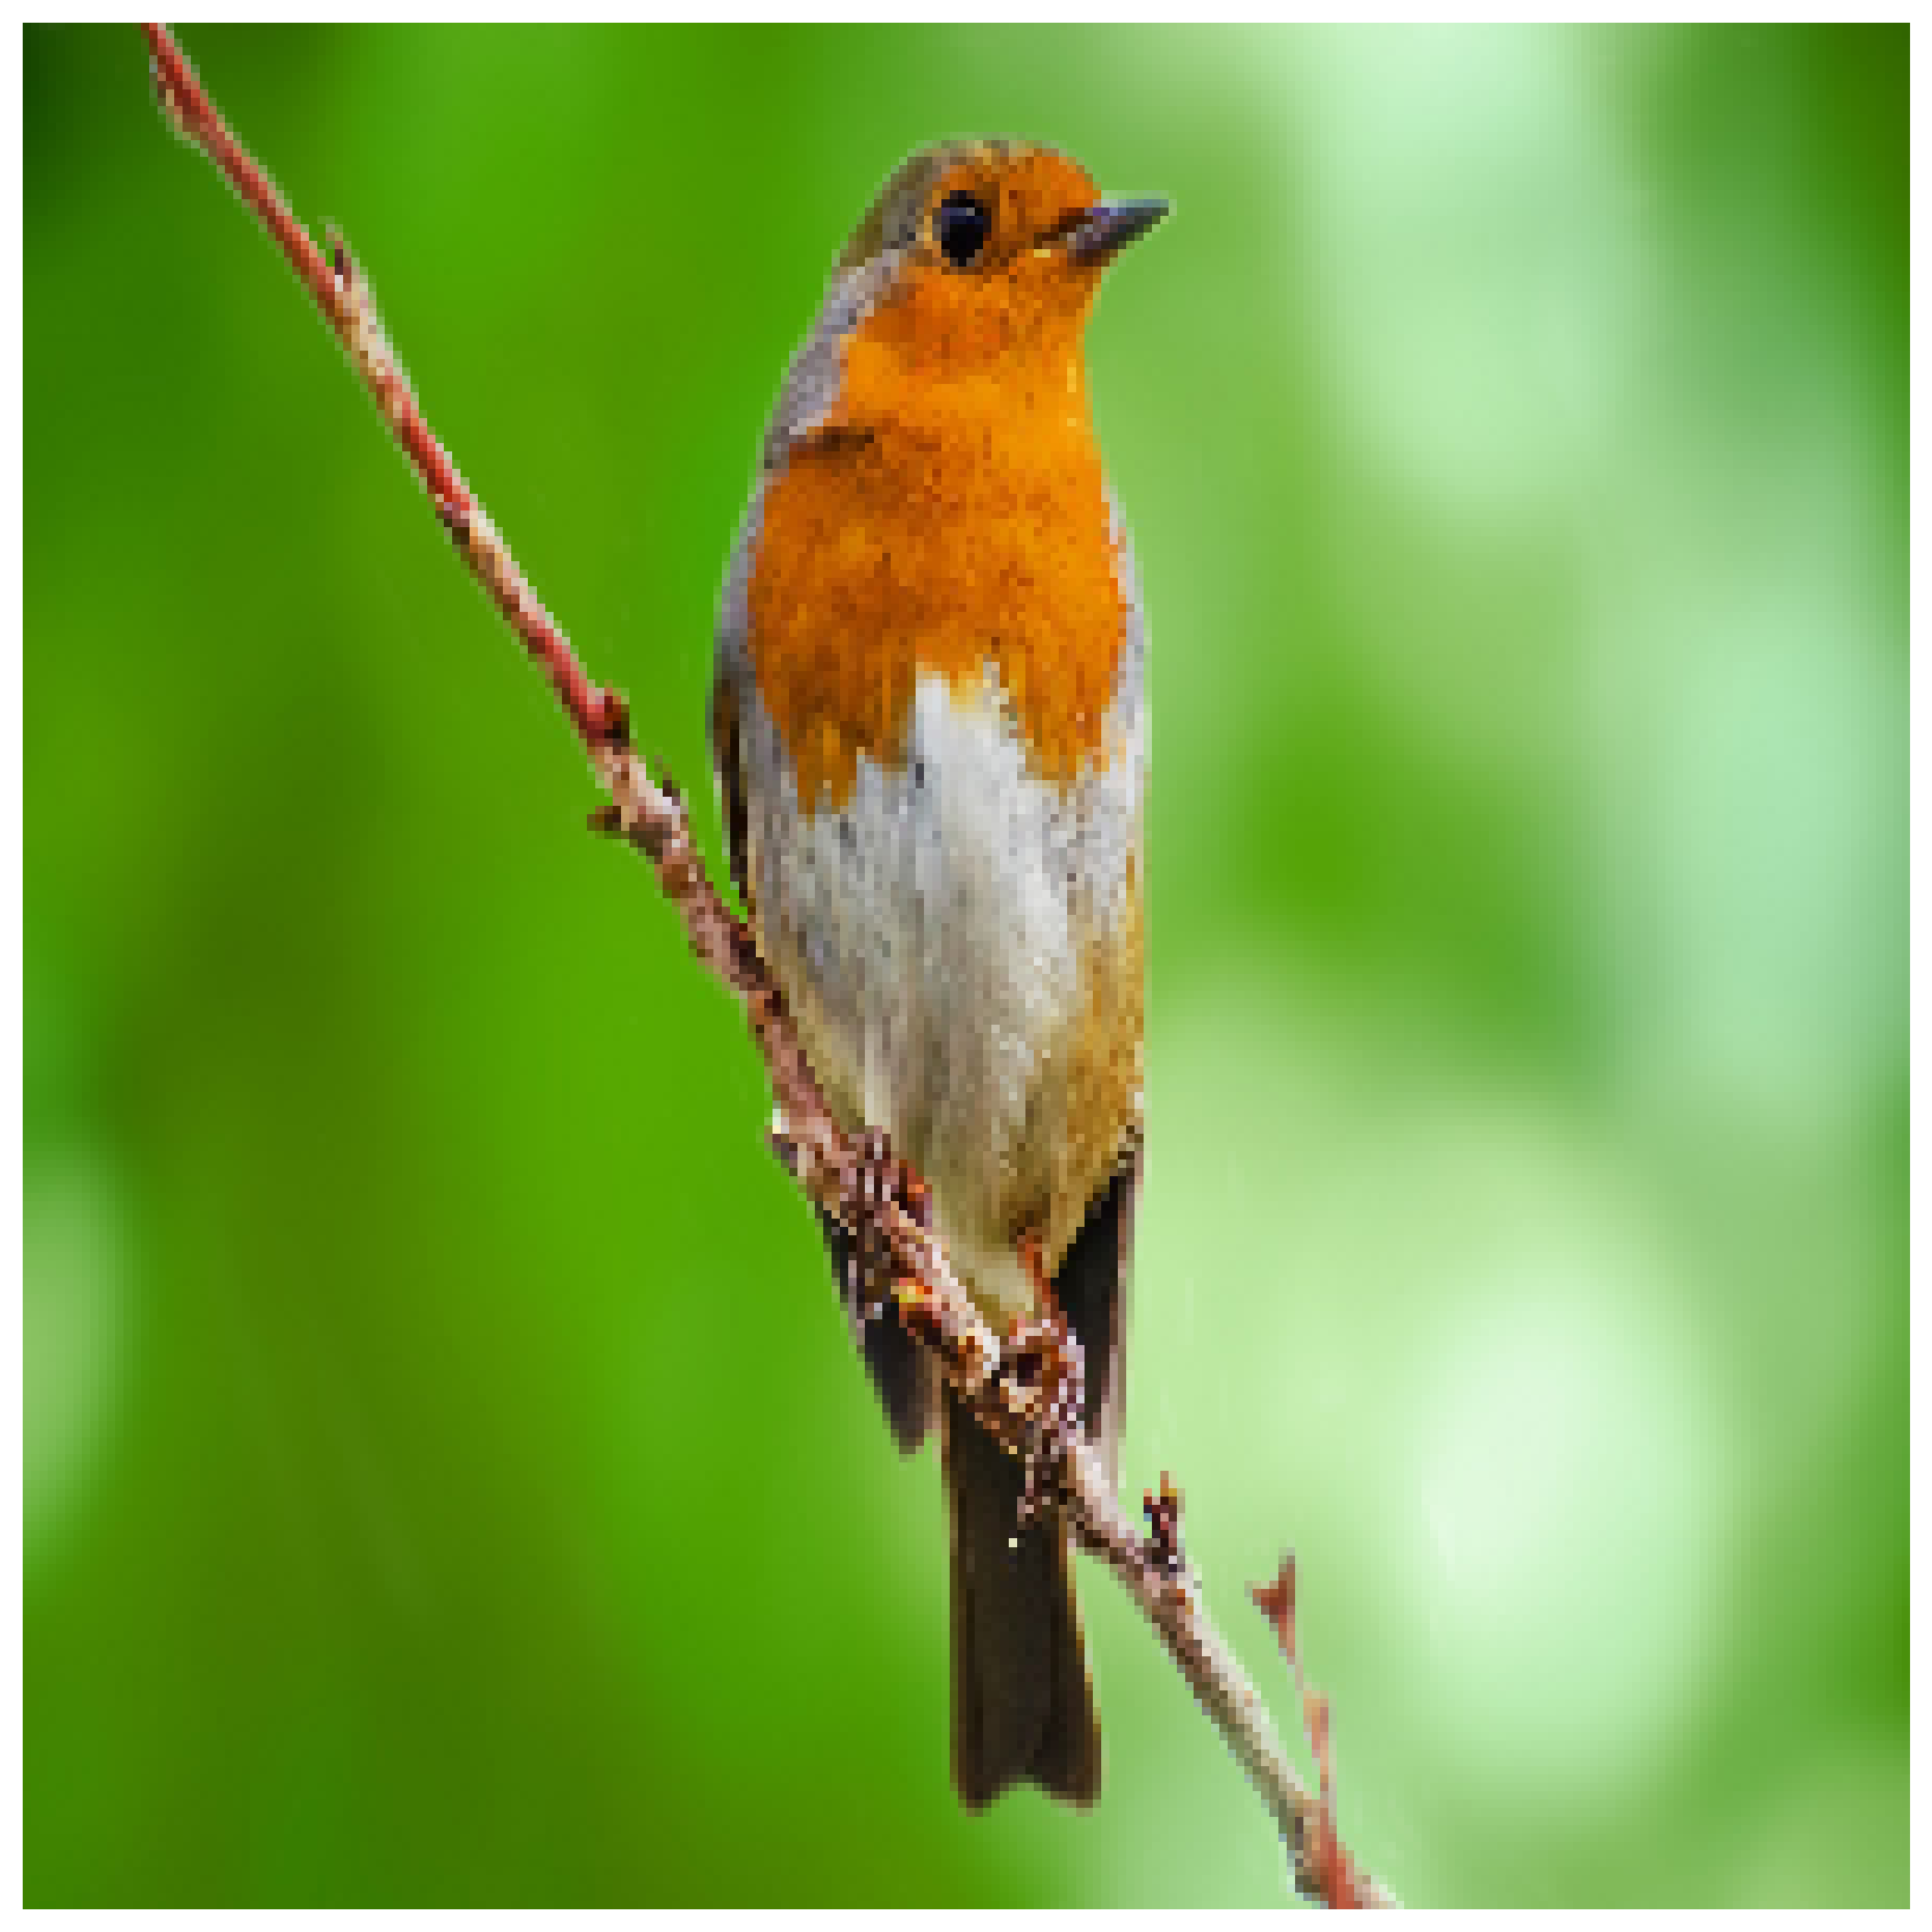

In [2]:
from PIL import Image

img = np.array(Image.open("bird1.jpg").resize((224, 224)))

yhat = vgg.predict(img.reshape(-1, 224, 224, 3))
label_key = np.argmax(yhat)
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()